# The extra mile

## Investigating NIfTI images with *NiBabel*

[NiBabel](https://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data.
To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](https://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation, from which this lesson is adapted from.

In [1]:
import nibabel as nib

First, use the `load()` function to create a NiBabel image object from a NIfTI file.
We'll load in an example dMRI file from the `data` folder.

In [2]:
dwi = "../../data/sub-01_dwi.nii.gz"

dwi_img = nib.load(dwi)

Loading in a NIfTI file with `NiBabel` gives us a special type of data object which encodes all the information in the file.
Each bit of information is called an **attribute** in Python's terminology.
To see all of these attributes, type `dwi_img.` followed by <kbd>Tab</kbd>.
There are three main attributes that we'll discuss today:

### 1. [Header](https://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [3]:
dwi_hdr = dwi_img.header
print(dwi_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 128 128  66  65   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   2.   2.   2.   8.8  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=81;Time=122951.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 126.844
qoffset_y       : -94.824005
qoffset_z       : -26.2652
s

### 2. Data

As you've seen above, the header contains useful information that gives us information about the properties (metadata) associated with the dMRI data we've loaded in.
Now we'll move in to loading the actual *image data itself*.
We can achieve this by using the `get_fdata()` method.

In [4]:
dwi_data = dwi_img.get_fdata()
dwi_data

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

What type of data is this exactly? We can determine this by calling the `type()` function on `dwi_data`.

In [5]:
type(dwi_data)

numpy.ndarray

The data is a multidimensional **array** representing the image data.

How many dimensions are in the `dwi_data` array?

In [6]:
dwi_data.ndim

4

As expected, the data contains 4 dimensions (*i, j, k* and gradient number).

How big is each dimension?

In [7]:
dwi_data.shape

(128, 128, 66, 65)

This tells us that the image is 128, 128, 66

Lets plot the first 10 volumes.

/opt/hostedtoolcache/Python/3.7.10/x64/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


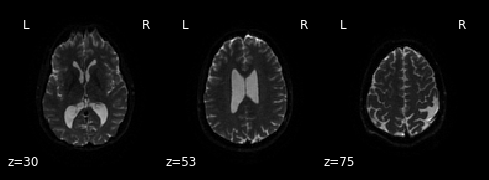

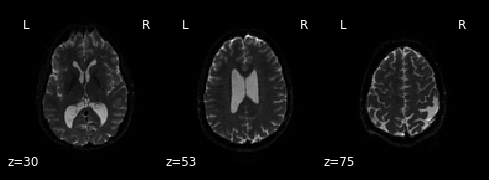

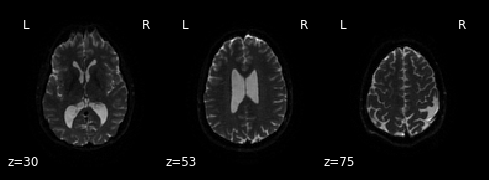

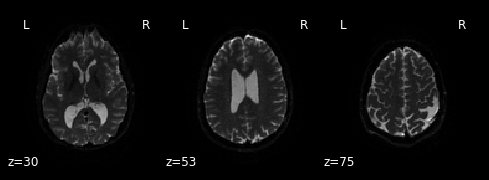

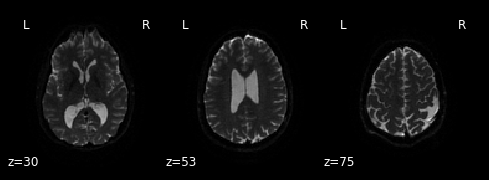

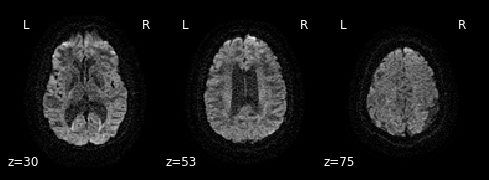

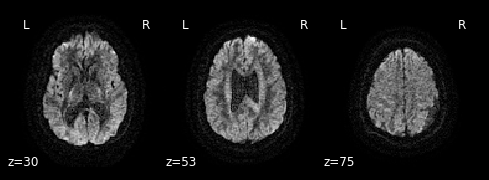

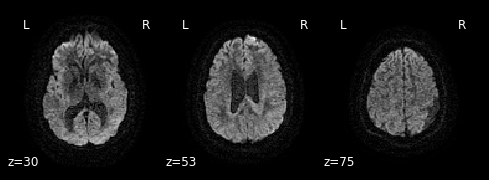

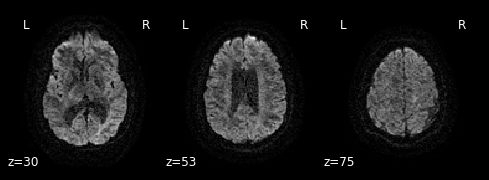

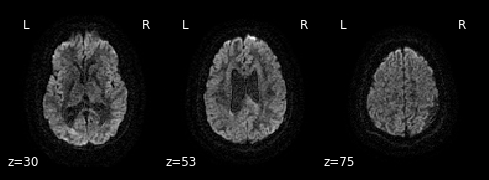

In [8]:
%matplotlib inline

from nilearn import image
from nilearn.plotting import plot_epi

selected_volumes = image.index_img(dwi, slice(0, 10))

for img in image.iter_img(selected_volumes):
    plot_epi(img, display_mode="z", cut_coords=(30, 53, 75), cmap="gray")

### 3. [Affine](https://nipy.org/nibabel/coordinate_systems.html): tells the position of the image array data in a reference space

The final important piece of metadata associated with an image file is the **affine matrix**.
Below is the affine matrix for our data.

In [9]:
dwi_affine = dwi_img.affine
dwi_affine

array([[ -2.        ,   0.        ,  -0.        , 126.84400177],
       [ -0.        ,   2.        ,  -0.        , -94.82400513],
       [  0.        ,   0.        ,   2.        , -26.26519966],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

To explain this concept, recall that we referred to coordinates in our data as *voxel coordinates (i,j,k)* coordinates such that:

* i is the first dimension of `dwi_data`
* j is the second dimension of `dwi_data`
* k is the third dimension of `dwi_data`

Although this tells us how to access our data in terms of voxels in a 3D volume, it doesn't tell us much about the actual dimensions in our data (centimetres, right or left, up or down, back or front).
The affine matrix allows us to translate between *voxel coordinates* and *world space coordinates* in (left/right,bottom/top,back/front).

An important thing to note is that in reality in which order you have:

* left/right
* bottom/top
* back/front

depends on how the affine matrix is constructed. For the data we're dealing with, it always refers to:

* Right
* Anterior
* Superior

Applying the affine matrix is done through using a *linear map* (matrix multiplication) on the voxel coordinates (defined in `dwi_data`).